In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Vehicle information dataset

In [ ]:
!unzip "/content/drive/MyDrive/Omdena :: Liverpool Chapter/Vehicle_Information.csv.zip"

Archive:  /content/drive/MyDrive/Omdena :: Liverpool Chapter/Vehicle_Information.csv.zip
replace Vehicle_Information.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [ ]:
vehicle_df=pd.read_csv('/content/Vehicle_Information.csv',encoding = 'unicode_escape')

In [ ]:
vehicle_df.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,ROVER,45 CLASSIC 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,BMW,C1,NaN,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,NISSAN,MICRA CELEBRATION 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,LONDON TAXIS INT,TXII GOLD AUTO,NaN,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,PIAGGIO,VESPA ET4,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


In [ ]:
vehicle_df.shape

(2177205, 24)

In [ ]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177205 entries, 0 to 2177204
Data columns (total 24 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Accident_Index                    object 
 1   Age_Band_of_Driver                object 
 2   Age_of_Vehicle                    float64
 3   Driver_Home_Area_Type             object 
 4   Driver_IMD_Decile                 float64
 5   Engine_Capacity_.CC.              float64
 6   Hit_Object_in_Carriageway         object 
 7   Hit_Object_off_Carriageway        object 
 8   Journey_Purpose_of_Driver         object 
 9   Junction_Location                 object 
 10  make                              object 
 11  model                             object 
 12  Propulsion_Code                   object 
 13  Sex_of_Driver                     object 
 14  Skidding_and_Overturning          object 
 15  Towing_and_Articulation           object 
 16  Vehicle_Leaving_Carriageway       ob

## Accident dataset

In [2]:
# load data
! gdown 1-9MNufnsez_Ju6wcn1_apbE4z6tHH3n7

Downloading...
From: https://drive.google.com/uc?id=1-9MNufnsez_Ju6wcn1_apbE4z6tHH3n7
To: /content/accident_data.parquet
100% 39.4M/39.4M [00:01<00:00, 36.0MB/s]


In [3]:
# Creating DataFrame
# pd.set_option('display.max_columns', 40)
df= pd.read_parquet('/content/accident_data.parquet')

In [ ]:
# First five records in the dataset
df.head()

In [ ]:
# shape of dataset
print('No. of rows:    ', df.shape[0])
print('No. of columns: ', df.shape[1])


In [ ]:
# columns info about data type, null values
df.info()

In [ ]:
df.describe(include=np.object).T

Date 2005 - 2010

#### Note
1.  Float columns: 9
2.  Integer columns: 4
3.  Object columns: 21

There are some columns that have missing values





## Duplicates

In [ ]:
# No. of duplicated rows
df.duplicated().sum()

This data have 6 duplicated row. So it is good to drop these records.

In [4]:
# droping duplicated rows and reset index
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

## Null values handling

In [ ]:
# check missing values
null_values_series=df.isnull().sum().sort_values(ascending=False)
print(null_values_series[null_values_series!=0],null_values_series[null_values_series!=0][0]/df.shape[0]*100)
print(null_values_series[null_values_series!=0]/df.shape[0]*100)

Droping NaN from columns having NaN < 2%

In [ ]:
# columns having null values < 2%
null_perc=null_values_series[null_values_series!=0]/df.shape[0]*100
dropna_from_columns=null_perc[null_perc<2].index.tolist()
dropna_from_columns

In [8]:
# Droping null values  and reset index
for column in dropna_from_columns:
  df.drop(df[df[column].isnull()].index.tolist(), inplace=True)
  df.reset_index(inplace=True, drop=True)

---
columns to focus more on handling Null values are shown below with percentage NAN values 


*   nd_Road_Class:                                   41.944688
*   1st_Road_Class:                                  29.143242
*   LSOA_of_Accident_Location:                      6.855915
*   Weather_Conditions:                               2.040114
*   2nd_Road_Number:                                  1.030261
---


In [ ]:
df.shape[0]/1048575

only 2% of all data were removed in process of handling null values.

Four features which data has to be imputed.
  
  2nd_Road_Class               
  1st_Road_Class               
  LSOA_of_Accident_Location     
  Weather_Conditions



In [9]:
df['2nd_Road_Class'].fillna('Unclassified', inplace=True)

In [10]:
df['1st_Road_Class'].fillna('A', inplace=True)

In [11]:
df['Weather_Conditions'].fillna('Fine no high winds', inplace=True)

## Baseline model Training with feature engineering

In [12]:
res_df=df[['1st_Road_Class','1st_Road_Number','2nd_Road_Class','2nd_Road_Number','Number_of_Casualties','Number_of_Vehicles','Speed_limit','Accident_Severity']]
res_df.head()

,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Accident_Severity
0,B,450.0,C,0.0,1,1,30,Slight
1,C,0.0,Unclassified,0.0,1,2,30,Slight
2,A,0.0,Unclassified,0.0,1,1,30,Slight
3,C,0.0,Unclassified,0.0,1,2,30,Slight
4,A,3212.0,B,304.0,2,2,30,Slight


In [15]:
X=res_df.iloc[:,:-1]
y=res_df['Accident_Severity']

In [16]:
# lable encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)
# 0: 
# 1: serious
# 2: slight

In [17]:
X=pd.get_dummies(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
print('Train accuracy: ',accuracy_score(y_train, clf.predict(X_train)))
print('Test accuracy: ',accuracy_score(y_test, clf.predict(X_test)))

## Visualization

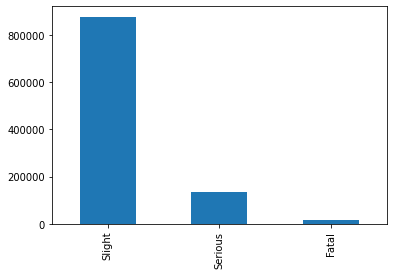

In [ ]:
df['Accident_Severity'].value_counts().plot(kind='bar')

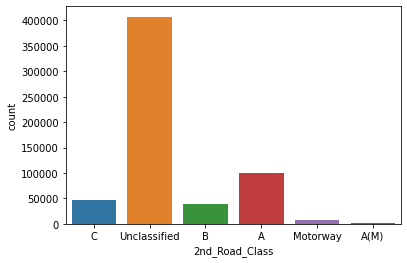

In [ ]:
sns.countplot(x=df['2nd_Road_Class'])


---
1. Most of 2nd road class are Unclassified. What does it mean?
2. What to use to fill Null value?
----


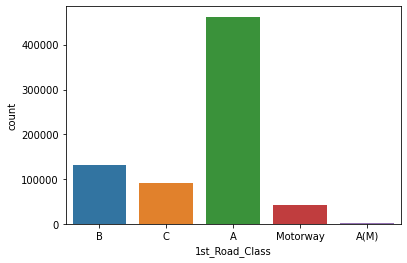

In [ ]:
sns.countplot(x=df['1st_Road_Class'])
plt.show()

---
1. Good thing all 1st class roads are classified
2. Most of the roads are  A type. Therefore we can fill missing values with mode i.e A class here because this feature is categorical.
--- 

In [ ]:
df['LSOA_of_Accident_Location'].nunique()

34213

---
1. After knowing this column is object type I directly used countplot asuming it has categorical values but I was wrong
2. It has 6% missing values that has to be handled.
3. It has 34226 unique values so what are ways to handle missing values:
    1. Replace NaN with mode values
---





In [ ]:
df['LSOA_of_Accident_Location'].value_counts()

E01000004    1529
E01011365    1140
E01008440     826
E01004736     716
E01005131     696
             ... 
E01001379       1
E01003369       1
E01002937       1
W01001006       1
W01001123       1
Name: LSOA_of_Accident_Location, Length: 34213, dtype: int64

1. What does this coulmn represents?

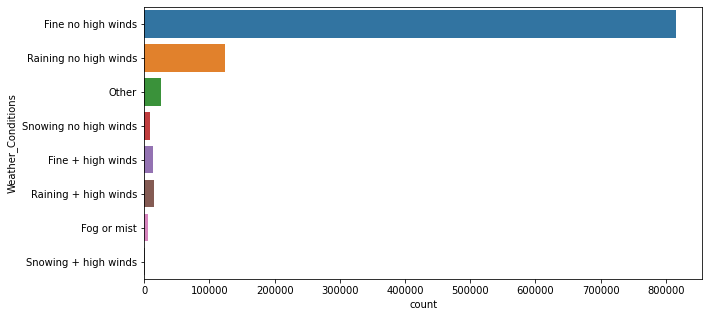

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['Weather_Conditions'])
plt.show()

---
1. Most accidents have happend in fine weather condition which shows that it does not have much effect on accidents.
2. Second most accidents have occured in rainy season with no high wind.

The above two findings shows that people mostly drives in good weather condition that is why accidents has happend most in good weather. Because in bad weather people does not come out of home so accidents are less.

*    NaN values in this coulumn can be handled by mode i.e 'Fine no high winds' 
---

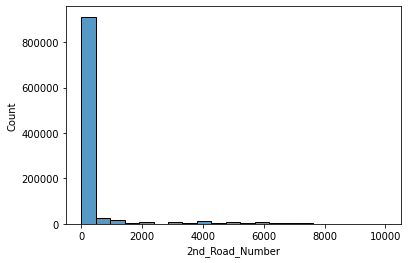

In [ ]:
sns.histplot(x=df['2nd_Road_Number'])
plt.show()

In [ ]:
# columns having null values < 2%
null_perc=null_values_series[null_values_series!=0]/df.shape[0]*100
dropna_from_columns=null_perc[null_perc<2].index.tolist()
dropna_from_columns

['2nd_Road_Number',
 'Road_Type',
 'Light_Conditions',
 'Road_Surface_Conditions',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Longitude',
 'Location_Northing_OSGR',
 'Location_Easting_OSGR',
 'Latitude',
 'Time',
 'Urban_or_Rural_Area',
 'InScotland',
 'Pedestrian_Crossing-Physical_Facilities',
 'Carriageway_Hazards',
 'Pedestrian_Crossing-Human_Control',
 'Special_Conditions_at_Site',
 '1st_Road_Number']

In [ ]:
# Droping null values  and reset index
for column in dropna_from_columns:
  df.drop(df[df[column].isnull()].index.tolist(), inplace=True)
  df.reset_index(inplace=True, drop=True)

In [ ]:
s = "8 March, 2017"
d = datetime.strptime(s, '%d %B, %Y')
print(d.strftime('%Y-%m-%d'))
d.strftime('%Y-%m-%d')

2017-03-08


'2017-03-08'

In [ ]:
df['month']=df.Date.dt.month_name()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026847 entries, 0 to 1026846
Data columns (total 34 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1026847 non-null  object 
 1   1st_Road_Class                               1026847 non-null  object 
 2   1st_Road_Number                              1026847 non-null  float64
 3   2nd_Road_Class                               1026847 non-null  object 
 4   2nd_Road_Number                              1026847 non-null  float64
 5   Accident_Severity                            1026847 non-null  object 
 6   Carriageway_Hazards                          1026847 non-null  object 
 7   Date                                         1026847 non-null  object 
 8   Day_of_Week                                  1026847 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  1

In [ ]:
'''columns to drop
1. Accident_Index : It is unique values and it does not related to severity of accident.
2. Did_Police_Officer_Attend_Scene_of_Accident	
3. Junction_Control


,'''

In [64]:
df['Carriageway_Hazards'].nunique()

6

In [65]:
df['Carriageway_Hazards'].unique()

array(['None', 'Other object on road', 'Previous accident',
       'Any animal in carriageway (except ridden horse)',
       'Vehicle load on road', 'Pedestrian in carriageway - not injured'],
      dtype=object)

In [ ]:
sns.countplot(data=df,y='Light_Conditions')

In [ ]:
df.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,month
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-04-01,200501BS00001,A,3218.0,None,0.0,Serious,None,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,None,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,17:42,Urban,Raining no high winds,2005,No,April
2005-05-01,200501BS00002,B,450.0,C,0.0,Slight,None,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No,May
2005-06-01,200501BS00003,C,0.0,None,0.0,Slight,None,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No,June
2005-07-01,200501BS00004,A,3220.0,None,0.0,Slight,None,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,None,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005,No,July
2005-10-01,200501BS00005,None,0.0,None,0.0,Slight,None,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No,October


In [24]:
X.head()

,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Number_of_Casualties,Number_of_Vehicles,Speed_limit
0,B,450.0,C,0.0,1,1,30
1,C,0.0,Unclassified,0.0,1,2,30
2,A,0.0,Unclassified,0.0,1,1,30
3,C,0.0,Unclassified,0.0,1,2,30
4,A,3212.0,B,304.0,2,2,30


In [ ]:
df['month'] = pd.DatetimeIndex(pd.to_datetime(df['smonth'], format='%b')).month

In [ ]:
df.index = pd.CategoricalIndex(df.index, 
                               categories=['January', 'February', 'March', 'April','May','Jun', 'July', 'August','September', 'October', 'November', 'December'], 
                               ordered=True)
df = df.sort_index()

In [ ]:
df.groupby(['month']).size()

month
April        82343
August       85632
December     79891
February     75671
January      88891
July         87789
June         86911
March        82315
May          87866
November     91587
October      90233
September    87718
dtype: int64

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df['Date'].dt.month_name()

0           4
1           5
2           6
3           7
4          10
           ..
1048570     2
1048571     2
1048572     2
1048573     2
1048574     2
Name: Date, Length: 1048575, dtype: int64

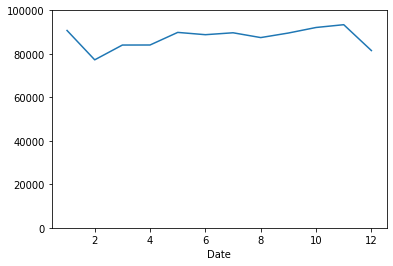

In [ ]:
ax = plt.gca()
ax.set_ylim([0, 100000])
df.groupby(df['Date'].dt.month).size().plot()

In [ ]:
df['month']=df['Date'].dt.month_name()

In [ ]:
df['month']

0             April
1               May
2              June
3              July
4           October
             ...   
1048570    February
1048571    February
1048572    February
1048573    February
1048574    February
Name: month, Length: 1048575, dtype: object

In [ ]:
df.groupby(['Year','month']).size()

Year  month    
2005  April        16272
      August       16867
      December     16264
      February     14387
      January      17492
                   ...  
2010  March        11720
      May          12770
      November     12526
      October      12927
      September    12653
Length: 72, dtype: int64

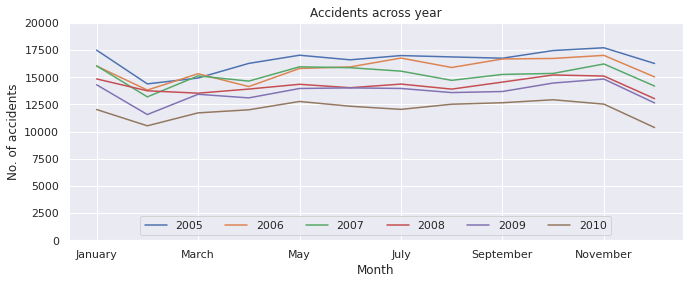

In [ ]:
sns.set(rc={'figure.figsize':(11, 4)})
ax = plt.gca()
ax.set_ylim([0, 20000])
for year in ['2005','2006','2007','2008','2009','2010']:
  df.loc[year].groupby('month').size().sort_index(key=lambda x: pd.to_datetime(x, format="%B")).plot()
plt.legend(['2005','2006','2007','2008','2009','2010'], loc="lower center", ncol=6)
# plt.legend()
plt.ylabel('No. of accidents')
plt.title('Accidents across year')
plt.xlabel('Month')
# df.loc['2006'].groupby('month').size().sort_index(key=lambda x: pd.to_datetime(x, format="%B")).plot()
plt.savefig("sample.jpg", dpi=150)


## Feature Engineering

## Time series analysis

Text(0.5, 0, 'Month')

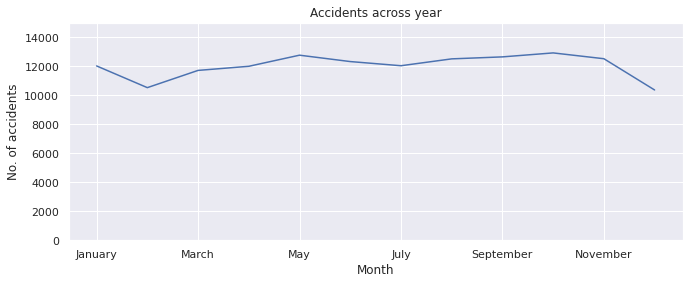

In [ ]:
sns.set(rc={'figure.figsize':(11, 4)})
ax = plt.gca()
ax.set_ylim([0, 15000])
df.loc[year].groupby('month').size().sort_index(key=lambda x: pd.to_datetime(x, format="%B")).plot()
plt.ylabel('No. of accidents')
plt.title('Accidents across year')
plt.xlabel('Month')
# plt.savefig("sample.jpg", dpi=150)

In [ ]:
df.loc[year].groupby('month').size().sort_index(key=lambda x: pd.to_datetime(x, format="%B")).reset_index()

,month,0
0,January,12029
1,February,10531
2,March,11720
3,April,12004
4,May,12770
5,June,12330
6,July,12043
7,August,12516
8,September,12653
9,October,12927


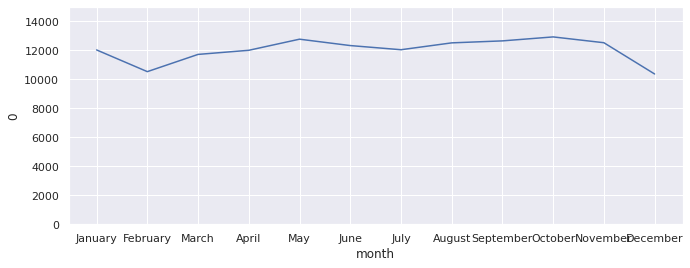

In [ ]:
ax = plt.gca()
ax.set_ylim([0, 15000])
sns.lineplot(data=df.loc[year].groupby('month').size().sort_index(key=lambda x: pd.to_datetime(x, format="%B")).reset_index(), x='month', y=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2005-04-01 to 2010-02-28
Data columns (total 34 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1048575 non-null  object 
 1   1st_Road_Class                               742986 non-null   object 
 2   1st_Road_Number                              1048573 non-null  float64
 3   2nd_Road_Class                               608751 non-null   object 
 4   2nd_Road_Number                              1037772 non-null  float64
 5   Accident_Severity                            1048575 non-null  object 
 6   Carriageway_Hazards                          1048546 non-null  object 
 7   Day_of_Week                                  1048575 non-null  object 
 8   Did_Police_Officer_Attend_Scene_of_Accident  1048306 non-null  float64
 9   Junction_Control               

In [ ]:
df.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,month
0,200501BS00001,A,3218.0,None,0.0,Serious,None,2005-04-01,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,None,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,17:42,Urban,Raining no high winds,2005,No,April
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-05-01,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No,May
2,200501BS00003,C,0.0,None,0.0,Slight,None,2005-06-01,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No,June
3,200501BS00004,A,3220.0,None,0.0,Slight,None,2005-07-01,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,None,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005,No,July
4,200501BS00005,None,0.0,None,0.0,Slight,None,2005-10-01,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No,October


In [ ]:
import pandas as pd
pd.to_datetime('2018-01-15 3:45pm')

Timestamp('2018-01-15 15:45:00')

In [ ]:
import datetime
mydate = datetime.datetime.now()
mydate.strftime("%B")

'October'

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.loc['2007']

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,month
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-05-06,200701BS64157,A,402.0,Unclassified,0.0,Serious,None,Tuesday,1.0,Give way or uncontrolled,T or staggered junction,51.506187,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524390.0,180110.0,-0.209082,E01002871,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,21:35,Urban,Fine no high winds,2007,No,May
2007-02-07,200701BS65737,A,3218.0,C,0.0,Serious,None,Monday,1.0,Auto traffic signal,Crossroads,51.495029,Daylight,Kensington and Chelsea,Kensington and Chelsea,526880.0,178930.0,-0.173647,E01002821,1,2,0.0,5.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,18:41,Urban,Raining no high winds,2007,No,February
2007-08-26,200701BS66127,A,40.0,None,0.0,Serious,None,Sunday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.517715,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,524280.0,181390.0,-0.210215,E01002878,1,3,0.0,0.0,Metropolitan Police,Dry,None,None,50,00:50,Urban,None,2007,No,August
2007-08-16,200701BS66128,B,314.0,Unclassified,0.0,Serious,None,Thursday,1.0,Give way or uncontrolled,T or staggered junction,51.495478,Daylight,Kensington and Chelsea,Kensington and Chelsea,524860.0,178930.0,-0.202731,E01002817,1,4,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,08:58,Urban,Fine no high winds,2007,No,August
2007-03-09,200701BS66837,A,3218.0,A,3220.0,Slight,None,Monday,1.0,Auto traffic signal,Crossroads,51.488576,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,525590.0,178180.0,-0.192487,E01002894,1,2,0.0,0.0,Metropolitan Police,Dry,None,None,30,21:17,Urban,None,2007,No,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-12-20,2.00798E+12,B,721.0,None,0.0,Slight,None,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,54.985289,Darkness - no lighting,Dumfries and Galloway,Dumfries & Galloway,322650.0,566300.0,-3.210294,None,1,1,0.0,0.0,Dumfries and Galloway,Frost or ice,Single carriageway,None,60,22:01,Rural,Other,2007,Yes,December
2007-12-21,2.00798E+12,B,721.0,None,0.0,Serious,None,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,54.984105,Daylight,Dumfries and Galloway,Dumfries & Galloway,323710.0,566150.0,-3.193693,None,2,1,0.0,0.0,Dumfries and Galloway,Frost or ice,Single carriageway,None,40,13:12,Rural,Other,2007,Yes,December
2007-12-23,2.00798E+12,A,7.0,None,0.0,Slight,None,Sunday,1.0,Data missing or out of range,Not at junction or within 20 metres,55.166369,Darkness - no lighting,Dumfries and Galloway,Dumfries & Galloway,336900.0,586230.0,-2.992068,None,1,1,0.0,0.0,Dumfries and Galloway,Frost or ice,Single carriageway,None,60,03:07,Rural,Fog or mist,2007,Yes,December
